In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
import os

In [2]:
import pathlib

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file('flower_photos', origin =dataset_url, cache_dir = '.', untar = True )

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
data_path = pathlib.Path(data_dir)

In [7]:
data_path

WindowsPath('datasets/flower_photos')

In [8]:
list(data_path.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [9]:
len(list(data_path.glob('*/*.jpg')))

3670

In [10]:
roses = list(data_path.glob('roses/*.jpg'))

In [11]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

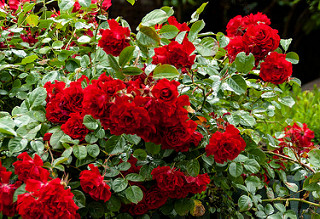

In [12]:
PIL.Image.open(roses[14])

In [13]:
flowers_names = {'roses' : 0, 'daisy' : 1, 'dandelion' : 2, 'sunflowers' : 3, 'tulips': 4}

In [14]:
flowers_names['daisy']

1

In [15]:
flowers_images_dict = {'roses' : list(data_path.glob('roses/*')),
                      'daisy' : list(data_path.glob('daisy/*')),
                      'dandelion' : list(data_path.glob('dandelion/*')),
                      'sunflowers' : list(data_path.glob('sunflowers/*')),
                      'tulips': list(data_path.glob('tulips/*'))
}

In [16]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [17]:
for i in flowers_images_dict:
    print(i, ":", flowers_images_dict[i])

roses : [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flower_photos/roses

In [18]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img.shape

(240, 179, 3)

In [21]:
img = cv2.imread(str(flowers_images_dict['roses'][11]))

In [22]:
img.shape

(256, 320, 3)

In [23]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [24]:
d  = {'a': 1, 'b':2}
d.items()

dict_items([('a', 1), ('b', 2)])

In [26]:
X, y = [], []
for flower_name, images in  flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img, (180, 180))
        X.append(resized)
        y.append(flowers_names[flower_name])
        

In [27]:
X[120].shape

(180, 180, 3)

In [28]:
X = np.array(X)
y = np.array(y)

In [ ]:
X = X/255

In [29]:
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
X_train.shape

(2936, 180, 180, 3)

In [33]:
X_test.shape

(734, 180, 180, 3)

In [34]:
X_train = X_train/255
X_test = X_test/255

In [35]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding = "same", activation = 'relu', input_shape = (180,180,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
])

In [36]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 38s 392ms/step - loss: 1.3009 - Accuracy: 0.4394
Epoch 2/5
92/92 [==============================] - 41s 442ms/step - loss: 0.9655 - Accuracy: 0.6196
Epoch 3/5
92/92 [==============================] - 60s 658ms/step - loss: 0.8050 - Accuracy: 0.6768
Epoch 4/5
92/92 [==============================] - 101s 1s/step - loss: 0.6049 - Accuracy: 0.7766
Epoch 5/5
92/92 [==============================] - 110s 1s/step - loss: 0.4036 - Accuracy: 0.8573


In [38]:
cnn.evaluate(X_test, y_test)

23/23 [==============================] - 9s 389ms/step - loss: 334.3320 - Accuracy: 0.5082


[334.3320007324219, 0.5081743597984314]

In [39]:
import matplotlib.pyplot as plt

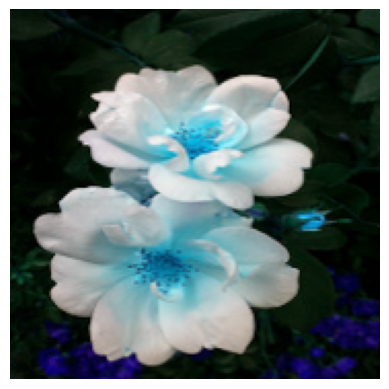

In [54]:
plt.axis('off')
plt.imshow(X[0])
plt.show()

In [41]:
data_augmentation = keras.layers.experimental.preprocessing.RandomZoom(0.5)

In [42]:
data_augmentation

In [43]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[10.849318 , 19.301365 , 11.849318 ],
        [ 8.916462 , 20.239164 , 10.131598 ],
        [ 7.183279 , 20.77762  ,  9.912841 ],
        ...,
        [22.808546 , 46.013805 , 32.06186  ],
        [19.966064 , 42.834465 , 28.985147 ],
        [20.781204 , 43.165134 , 29.397272 ]],

       [[11.4835   , 20.277336 , 12.717719 ],
        [ 9.889389 , 21.01604  , 11.016042 ],
        [ 8.934404 , 20.355928 , 10.2533045],
        ...,
        [22.762508 , 45.96777  , 32.751484 ],
        [18.471687 , 40.708946 , 27.582294 ],
        [20.638433 , 44.356155 , 26.87534  ]],

       [[10.395027 , 21.750954 , 13.434126 ],
        [10.29487  , 22.500116 , 12.397492 ],
        [10.102622 , 22.49205  , 12.297337 ],
        ...,
        [25.455282 , 48.671074 , 34.557922 ],
        [24.20131  , 47.20131  , 33.098686 ],
        [22.56284  , 46.23784  , 27.21362  ]],

       ...,

       [[ 6.875932 , 14.471936 ,  7.72525  ],
        [ 4.3

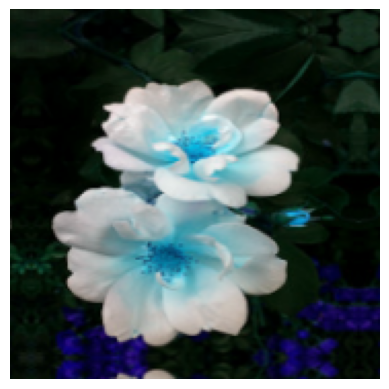

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

In [45]:
data_augmentation = keras.layers.experimental.preprocessing.RandomRotation(0.5)

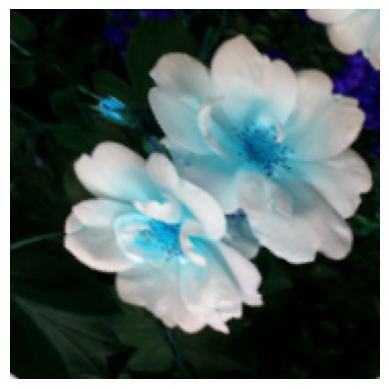

In [46]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

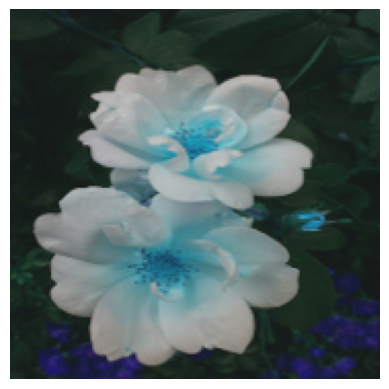

In [47]:
data_augmentation = keras.layers.experimental.preprocessing.RandomContrast(0.5)
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

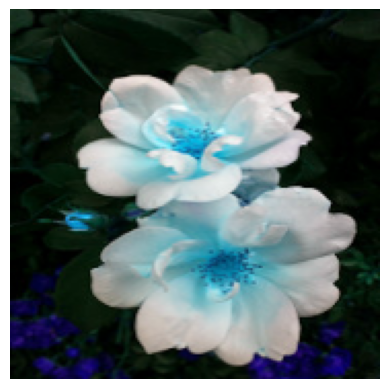

In [48]:
data_augmentation = keras.layers.experimental.preprocessing.RandomFlip('horizontal')
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

In [49]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)  
])

In [50]:
cnn = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
])

In [51]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [52]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 134s 1s/step - loss: 1.2454 - Accuracy: 0.4819
Epoch 2/5
92/92 [==============================] - 133s 1s/step - loss: 1.0270 - Accuracy: 0.5869
Epoch 3/5
92/92 [==============================] - 133s 1s/step - loss: 0.9507 - Accuracy: 0.6243
Epoch 4/5
92/92 [==============================] - 102s 1s/step - loss: 0.8809 - Accuracy: 0.6577
Epoch 5/5
92/92 [==============================] - 134s 1s/step - loss: 0.8411 - Accuracy: 0.6723


In [53]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 132s 1s/step - loss: 0.7766 - Accuracy: 0.7040
Epoch 2/10
92/92 [==============================] - 132s 1s/step - loss: 0.7310 - Accuracy: 0.7214
Epoch 3/10
92/92 [==============================] - 132s 1s/step - loss: 0.6774 - Accuracy: 0.7466
Epoch 4/10
92/92 [==============================] - 128s 1s/step - loss: 0.6588 - Accuracy: 0.7483
Epoch 5/10
92/92 [==============================] - 133s 1s/step - loss: 0.6323 - Accuracy: 0.7629
Epoch 6/10
92/92 [==============================] - 132s 1s/step - loss: 0.6073 - Accuracy: 0.7718
Epoch 7/10
92/92 [==============================] - 105s 1s/step - loss: 0.5700 - Accuracy: 0.7817
Epoch 8/10
92/92 [==============================] - 130s 1s/step - loss: 0.5405 - Accuracy: 0.7973
Epoch 9/10
92/92 [==============================] - 116s 1s/step - loss: 0.5083 - Accuracy: 0.8042
Epoch 10/10
92/92 [==============================] - 127s 1s/step - loss: 0.4937 - Accuracy: 0.8116
